In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../dataset/train.csv')

# Main functions 

In [37]:
def get_img(idx):
    grid_data = dataset.iloc[idx].as_matrix().reshape(28,28)
    return(grid_data)
def show_img(img):
    plt.imshow(img,interpolation="none",cmap="gray")
    plt.show()
def predict(weights_train,weights_predict):
    diff  = weights_train - weights_predict
    norms = np.linalg.norm(diff, axis=1)
    return np.where(norms == min(norms))[0][0]
def get_img(idx):
    grid_data = dataset.iloc[idx].as_matrix().reshape(28,28)
    return(grid_data)
def show_img(img):
    plt.imshow(img,interpolation="none",cmap="gray")
    plt.show()
def get_mean():
    mean_of_images = np.zeros((1,height*width))
    for i in training_set:
        mean_of_images = np.add(mean_of_images,i)
    mean_of_images = np.divide(mean_of_images,float(amount)).flatten()
    return mean_of_images
def show_from_eigen_parts(weights,proj_data,digit,normalised_digits):
    img = 0
    for i in range(proj_data.shape[0]):
        img +=proj_data[i]*weights[digit][i]
    img+=mean_of_images
    img = img.reshape(height,width)
    show_img(img)

In [22]:
amount = 10
height = 28
width = 28
training_set= np.ndarray(shape=(10, height*width), dtype=np.float64)
for i in range(10):
    current = df.loc[df['label'] == i]
    current = current.drop('label',axis=1)
    current = current.iloc[0].as_matrix()
    training_set[i,:] = np.array(current,dtype='float64').flatten()

/Users/kolakolasic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


/Users/kolakolasic/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


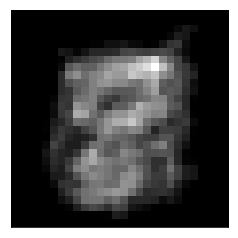

In [23]:
mean_of_images = get_mean()

plt.imshow(mean_of_images.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()


## normalizing digits

In [24]:
normalised_digits = np.ndarray(shape=(amount, height*width))
for i in range(amount):
    normalised_digits[i] = np.subtract(training_set[i],mean_of_images)

## normilized digits 

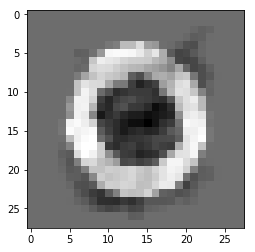

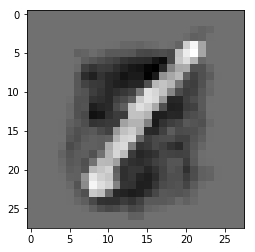

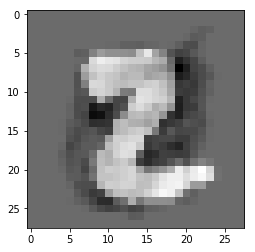

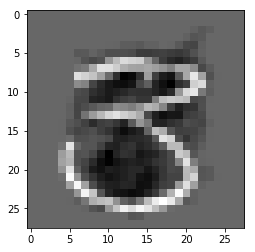

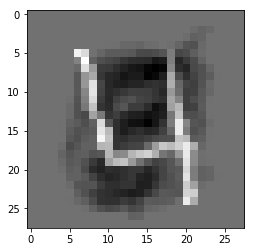

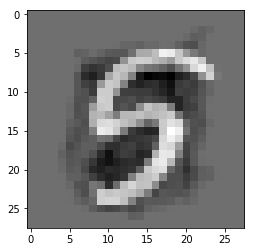

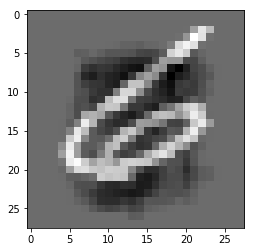

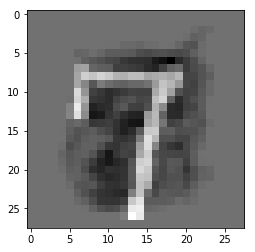

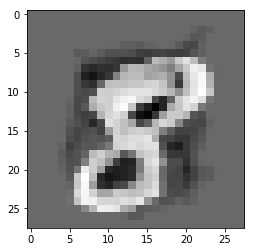

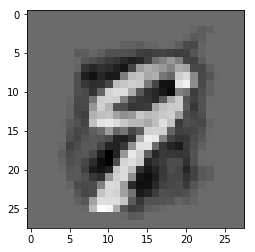

In [25]:
amount_to_show = 10
for i in range(amount_to_show):
    img = normalised_digits[i].reshape(height,width)
    show_img(img)

### Covariance matrix

In [26]:
cov_matrix = np.cov(normalised_digits)
cov_matrix = np.divide(cov_matrix,8.0)

# calculating eigenvalues, eigenvectors

In [27]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)

In [28]:
#sorting to get the most relevant
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

Cumulative proportion of variance explained vector: 
[0.20927081 0.37423053 0.50601207 0.63452216 0.72998815 0.80918902
 0.88515254 0.94725173 1.         1.        ]


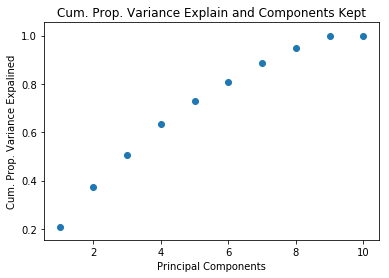

In [43]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')
plt.scatter(num_comp, var_comp_sum)
plt.show()

# building projections
projections on to the pricipal components

In [30]:
amunt_of_component = 8
reduced_data = np.array(eigvectors_sort[:amunt_of_component]).transpose()
proj_data = np.dot(training_set.transpose(),reduced_data)
proj_data = proj_data.transpose()

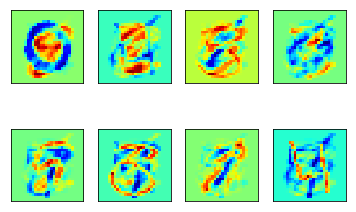

In [31]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

calculating Weights 

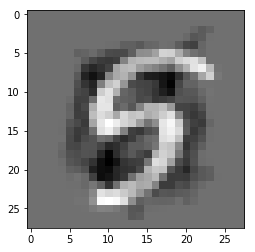

In [44]:
weights = np.array([np.dot(proj_data,i) for i in normalised_digits])
show_from_eigen_parts(weights,proj_data,5,normalised_digits)

/Users/kolakolasic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


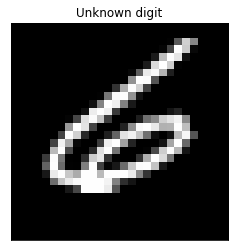

In [45]:
current = df.loc[df['label'] == 6]
current = current.drop('label',axis=1)
current = current.iloc[0].as_matrix().reshape(28,28)
unknown_digit= current
unknown_digit_vector = np.array(unknown_digit, dtype='float64').flatten()
plt.imshow(unknown_digit, cmap='gray')
plt.title('Unknown digit')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

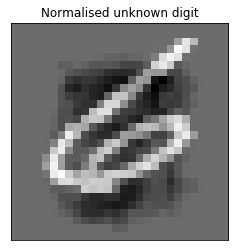

In [46]:
unknown_digit_vector = np.subtract(unknown_digit_vector,mean_of_images)
plt.imshow(unknown_digit_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown digit')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# Predicting
predicting which digit is showed

In [47]:
weights_unknown = np.dot(proj_data, unknown_digit_vector)
predict(weights,weights_unknown)

6